In [15]:
''' Data Acquisition '''
# pandas is used for the data manipulation
import pandas as pd

#Read the data
features = pd.read_csv("Churn_Modelling.csv")
features.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 13)
         RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11 columns]
10000


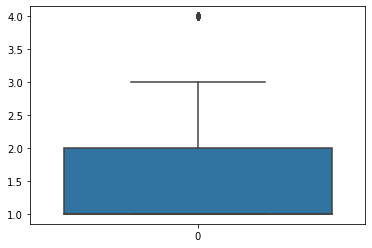

In [16]:
# Identifying Anomalies/missing data
del features['Surname']
print(features.shape)
print(features.describe())

# Anomalies in credit score
import seaborn as sns
import matplotlib.pyplot as plt

#sns.boxplot(data = features['CreditScore'])
sns.boxplot(data = features['NumOfProducts'])
print(len(features))


In [17]:
#num_exit = sum(features.Exited==1)
#data_no_exit = features.loc[features["Exited"] == 0]
#data_exit = features.loc[features["Exited"] == 1]

#sampled_data_no_exit = data_no_exit.sample(n=num_exit, random_state=2020)

#churn_balanced = sampled_data_no_exit.append(data_exit)
#print(len(churn_balanced))

print(len(features.loc[features["Exited"] == 1]))
print(len(features.loc[features["Exited"] == 0]))
Exited_data = features.loc[features['Exited'] == 1]
Non_Exited_data = features.loc[features['Exited'] == 0]

sample_data_exit = Exited_data.sample(n = len(Non_Exited_data), random_state = 2020, replace = True)
print(sample_data_exit.head())
print(len(features.loc[features["Exited"] == 1]))
print(len(features.loc[features["Exited"] == 0]))
print(len(sample_data_exit))
features = Non_Exited_data.append(sample_data_exit)
print(len(features))



2037
7963
      RowNumber  CustomerId  ...  EstimatedSalary Exited
4104       4105    15676571  ...           944.41      1
1917       1918    15699772  ...         72876.43      1
6505       6506    15761053  ...          1140.02      1
2988       2989    15684801  ...        156878.42      1
8388       8389    15806570  ...         77203.72      1

[5 rows x 13 columns]
2037
7963
7963
15926


In [18]:
# #Get dummies
#del features['CustomerId']
#del features['Surname']
#del features['RowNumber']
#del features['Geography']
# features.columns
del features['Geography']
del features['CustomerId']
features = pd.get_dummies(features)
features.head()
features['Bal/Sal'] = features['Balance']/features['EstimatedSalary']
print(features.head())
del features['Balance']
del features['EstimatedSalary']
#del features['Surname']

   RowNumber  CreditScore  Age  ...  Gender_Female  Gender_Male   Bal/Sal
1          2          608   41  ...              1            0  0.744677
3          4          699   39  ...              1            0  0.000000
4          5          850   43  ...              1            0  1.587055
6          7          822   50  ...              0            1  0.000000
8          9          501   44  ...              0            1  1.895518

[5 rows x 13 columns]


In [19]:
import numpy as np

labels = features['Exited']

del features['Exited']
del features['RowNumber']

feature_list = list(features.columns)

#features = np.array(features)



In [20]:

from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.30, random_state = 42)

In [21]:
print(train_features.shape)
print(test_features.shape)
print(train_labels)
print(test_labels)

(11148, 9)
(4778, 9)
8100    0
4080    1
9062    1
7427    0
7877    1
       ..
7474    1
6792    0
1083    0
8349    1
9161    0
Name: Exited, Length: 11148, dtype: int64
7717    0
8943    0
2097    0
7832    1
2032    1
       ..
7819    0
2173    0
9007    0
6061    1
6147    0
Name: Exited, Length: 4778, dtype: int64


In [22]:
# baseline_preds = test_features[:,feature_list.index('IsActiveMember')]
# baseline_errors = abs(baseline_preds-test_labels)
# print(round(np.mean(baseline_errors),2))

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)

rf.fit(train_features,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions = rf.predict(test_features)
pred_train = rf.predict(train_features)

errors = abs(predictions-test_labels)

print(round(np.mean(errors),2))

0.07


In [25]:
from sklearn import metrics
print(metrics.accuracy_score(train_labels,pred_train))
print("Accuracy",metrics.accuracy_score(test_labels,predictions))
print(metrics.confusion_matrix(test_labels,predictions))


1.0
Accuracy 0.926747593135203
[[2123  275]
 [  75 2305]]


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [27]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='lightblue', label='ROC')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.98


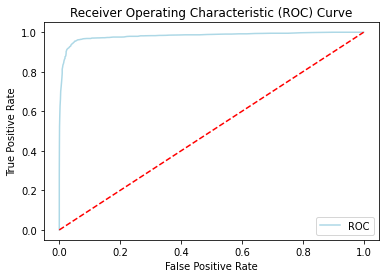

In [12]:
y_pred_proba = rf.predict_proba(test_features)[:,1]
auc = roc_auc_score(test_labels, y_pred_proba)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)
plot_roc_curve(fpr, tpr)

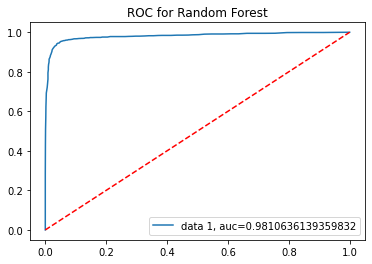

In [28]:
#import scikitplot as skplt
import matplotlib.pyplot as plt
y_pred_proba = rf.predict_proba(test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels, y_pred_proba)
auc = metrics.roc_auc_score(test_labels, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC for Random Forest')
plt.legend(loc=4)
plt.show()

In [29]:
# Finding Important features
feature_imp = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending = False)
print(feature_imp)

Age               0.289693
CreditScore       0.199770
Bal/Sal           0.183660
NumOfProducts     0.143338
Tenure            0.106839
IsActiveMember    0.036472
HasCrCard         0.021302
Gender_Male       0.009733
Gender_Female     0.009193
dtype: float64


No handles with labels found to put in legend.


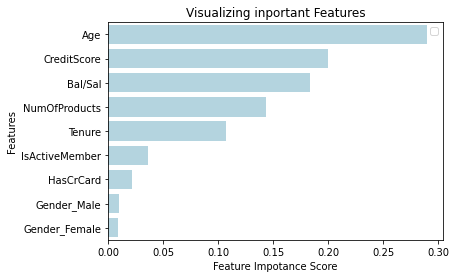

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.barplot(x = feature_imp,y = feature_imp.index,color="lightblue")

plt.xlabel('Feature Impotance Score')
plt.ylabel('Features')
plt.title("Visualizing inportant Features")
plt.legend()
plt.show()

In [44]:
# creating model on specific features

features = pd.read_csv("Churn_Modelling.csv")
X = features[['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts','Tenure','IsActiveMember']]
Y = features['Exited']

feature_list = X.columns


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.70, random_state = 5)

In [45]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train,Y_train)

y_pred = clf.predict(X_test)

print("Accuracy",metrics.accuracy_score(Y_test,y_pred))

Accuracy 0.8498571428571429


In [ ]:
print("Accuracy",metrics.accuracy_score(Y_test,y_pred))
print(metrics.confusion_matrix(Y_test,y_pred))

Accuracy 0.8517142857142858
[[5340  237]
 [ 801  622]]


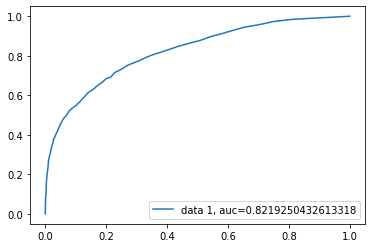

In [47]:
import matplotlib.pyplot as plt
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [48]:
from sklearn.tree import export_graphviz
import pydot

tree = clf.estimators_[1]

export_graphviz(tree,out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph,) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree1.png')

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, test_features, test_labels, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.83786611 0.87029289 0.83682008 0.83560209 0.85863874]
Accuracy: 0.85 (+/- 0.03)
